Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top 15 Resultados STV: [MNDE]    72
[SEI]     54
[SAVM]    44
[ELA]     38
[GLM]     32
[STX]     28
[GMX]     26
[IOTX]    24
[POWR]    22
[POND]    21
[CRU]     20
[AVAX]    16
[DHT]     15
[GFI]     10
[INST]    10
dtype: int64


<ipython-input-15-fcb4be43d289>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=resultados.index.str.replace('[', '').str.replace(']', ''), y=resultados.values, palette=palette, dodge=False)
<ipython-input-15-fcb4be43d289>:46: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=resultados.index.str.replace('[', '').str.replace(']', ''), y=resultados.values, palette=palette, dodge=False)


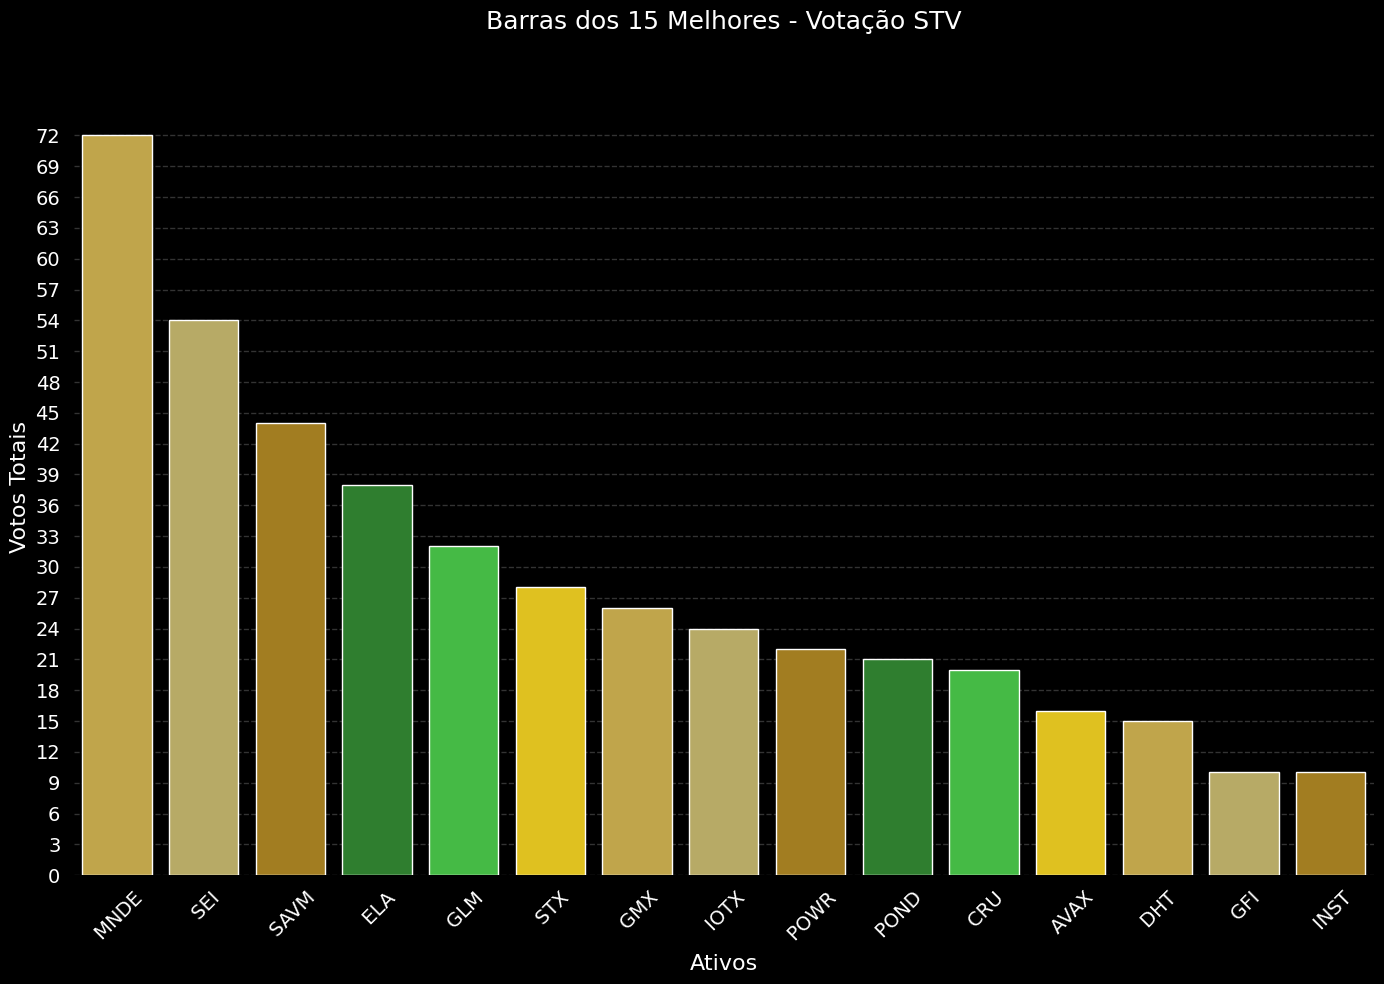

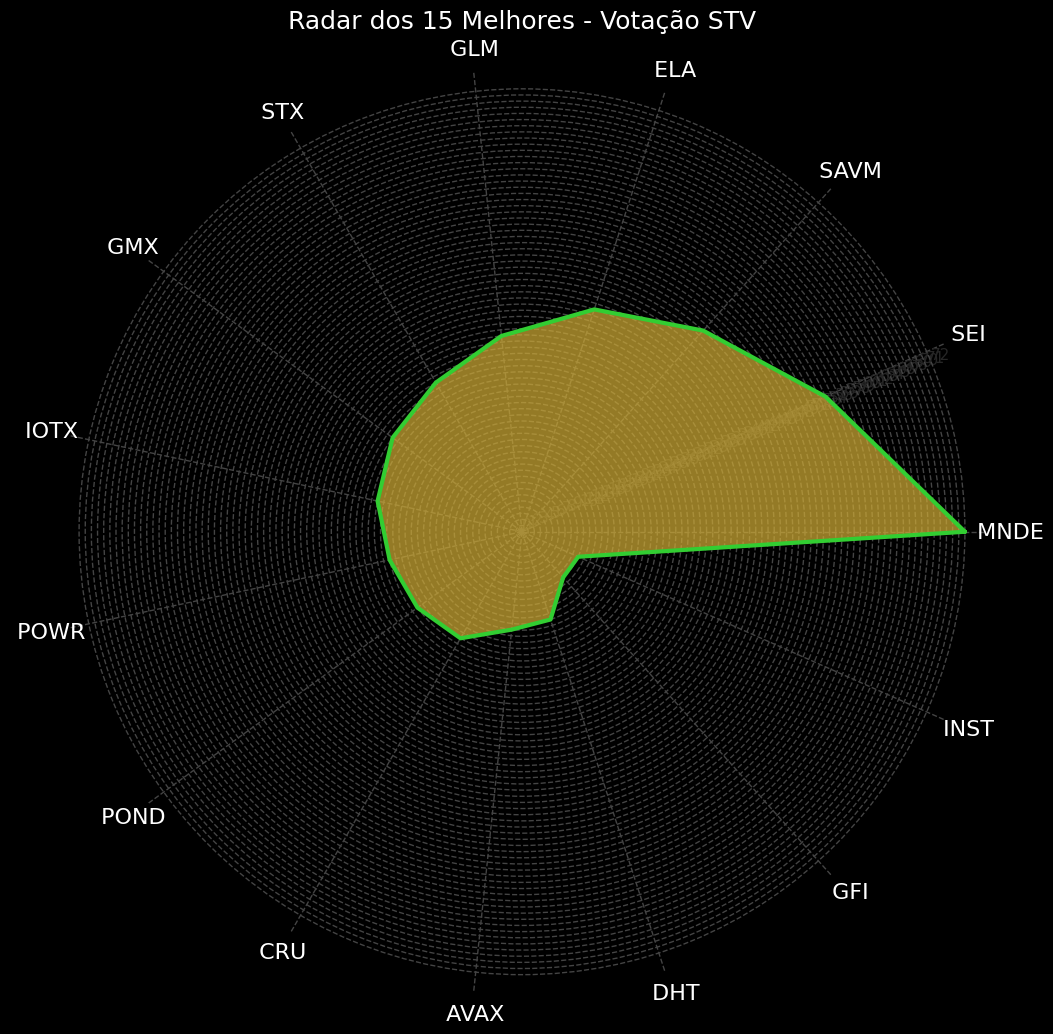

In [15]:
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Autenticação e montagem do Drive
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
drive.mount('/content/drive')

# Configurações
output_dir = '/content/drive/MyDrive/rankedpool/'
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1GHn8ZSrAyi9d8kVgIfv2Yq-Cq_YD-NYaCDN15VPHO2g/edit?usp=sharing'

# Acesso à planilha
spreadsheet = gc.open_by_url(spreadsheet_url)
worksheet = spreadsheet.worksheet('Respostas')
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])

# Processamento STV
def processar_votos(df):
    candidatos = df.columns[2:]
    resultados = {candidato: 0 for candidato in candidatos}
    for _, row in df.iterrows():
        for idx, candidato in enumerate(candidatos):
            if row[candidato]:
                resultados[candidato] += len(candidatos) - idx
    return resultados

resultados = processar_votos(df)
resultados_ordenados = pd.Series(resultados).sort_values(ascending=False)
top_15_resultados = resultados_ordenados.head(15)
print("Top 15 Resultados STV:", top_15_resultados)

# Função para plotar o gráfico de barras
def plot_bar_chart(resultados, title, output_path):
    plt.figure(figsize=(14, 10))
    sns.set(style="whitegrid")
    palette = ['#D4AF37', '#C5B358', '#B8860B', '#228B22', '#32CD32', '#FFD700']
    ax = sns.barplot(x=resultados.index.str.replace('[', '').str.replace(']', ''), y=resultados.values, palette=palette, dodge=False)

    ax.set_facecolor('black')
    plt.gcf().set_facecolor('black')
    ax.set_xlabel('Ativos', fontsize=16, color='white')
    ax.set_ylabel('Votos Totais', fontsize=16, color='white')
    ax.set_title(title, fontsize=18, color='white', pad=50) # Aumenta o espaçamento do título
    ax.tick_params(axis='x', colors='white', labelsize=14, rotation=45)
    ax.tick_params(axis='y', colors='white', labelsize=14)
    ax.grid(True, which='major', axis='y', color='#333333', linestyle='--', linewidth=1) # Cor da grade mais escura
    ax.set_yticks(np.arange(0, resultados.max() + 3, 3)) # Define o intervalo do eixo y para 3
    ax.spines['top'].set_visible(False) # Remove a borda superior
    ax.spines['right'].set_visible(False) # Remove a borda direita
    ax.spines['bottom'].set_visible(False) # Remove a borda inferior
    ax.spines['left'].set_visible(False) # Remove a borda esquerda
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()


# Função para plotar o gráfico de radar
def plot_radar(resultados, title, output_path):
    labels = resultados.index.str.replace('[', '').str.replace(']', '')
    stats = list(resultados.values)
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    ax.fill(angles, stats, color='#D4AF37', alpha=0.7)
    ax.plot(angles, stats, color='#32CD32', linewidth=3)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='white', fontsize=16)
    ax.set_yticks(np.arange(0, max(stats) + 1, 1))
    ax.spines['polar'].set_visible(False) # Remove a linha da circunferência
    ax.grid(color='#444444', linestyle='--', linewidth=1) # Cor da grade mais escura
    plt.title(title, fontsize=18, color='white', pad=30) # Aumenta o espaçamento do título
    plt.savefig(output_path)
    plt.show()


# Geração dos gráficos
plot_bar_chart(top_15_resultados, "Barras dos 15 Melhores - Votação STV", f"{output_dir}barras.png")
plot_radar(top_15_resultados, "Radar dos 15 Melhores - Votação STV", f"{output_dir}radar.png")
